# Give Me Some Credit: V. Miguel Sempere Navarro

## Objectives

The goal is to build a model that helps borrowers to make the best financial decisions.

The main KPI is:

- Delinquency Rate (no payment)

## Data dictionary

### Initial exploration


**SeriousDlqin2yrs**: Person experienced 90 days past due delinquency or worse

**RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age**: Age of borrower in years (eliminate all ceros, perform the log of age, why? difference between log of 20 and 25 is very different from log of 60 and log of 65)

**NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio**: Monthly debt payments, alimony, living costs divided by monthy gross income

**MonthlyIncome**: Monthly income (those with MI=0, will have debt ratio with weird values, must correct manually)

**NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import xgboost as XGB
from IPython.display import Image
from IPython.core.display import HTML 
from xgboost import XGBClassifier
from numpy import loadtxt
from matplotlib import pyplot
from sklearn import svm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

## Load data

Now we will analyze our training data to later compare it with the test one.

In [2]:
train_data = pd.read_csv('cs-training.csv', sep=',', index_col=[0])

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [4]:
train_data.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [5]:
train_data.tail(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149991,0,0.055518,46,0,0.609779,4335.0,7,0,1,0,2.0
149992,0,0.104112,59,0,0.477658,10316.0,10,0,2,0,0.0
149993,0,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0
149994,0,1.000000,22,0,0.000000,820.0,1,0,0,0,0.0
149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [6]:
len(train_data)

150000

In [7]:
train_data.sample(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
14407,0,0.526474,23,0,0.004998,3000.0,2,0,0,0,0.0
145845,0,0.033210,67,0,56.000000,NaN,4,0,0,0,1.0
98527,0,0.000266,50,0,318.000000,NaN,7,0,0,0,0.0
20897,0,0.000491,63,0,812.000000,NaN,7,0,1,0,1.0
38038,0,0.581767,58,0,0.812744,12052.0,26,0,2,0,0.0
135896,0,0.279767,23,0,0.282962,1660.0,5,0,0,0,0.0
115036,0,0.236814,41,0,0.676358,7050.0,9,0,4,0,2.0
36141,0,0.027231,66,0,4072.000000,NaN,8,0,1,0,0.0
147237,0,0.164341,40,0,2291.000000,NaN,8,0,2,0,1.0
76956,0,1.000000,83,0,0.447343,2031.0,4,0,1,0,0.0


In [8]:
#We can see that both Monthly income and number of dependents have missing values
train_data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [9]:
#Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric Python packages
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


We can observe the minimum of the age, it is zero, something that does not have too much sense, but if we look at NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse and NumberOfTime30-59DaysPastDueNotWorse It seems that they provide us with information the same as their maximum is the same ** 98.000000 ** and the number of observations more of the same ** 150,000 **, we will see the relationships among themselves, with the correlation matrix.

The characteristic of age seems to have an atypical value of 0. I guess it is not registered and also attributed to the median age. Meanwhile, the features NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse and NumberOfTime30-59DaysPastDueNotWorse seem to give the same information. In addition, NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines.

**Now we are going to perform the exploratory data analysis on the test part.**

In [10]:
test_data = pd.read_csv('cs-test.csv', sep=',', index_col=[0])

In [11]:
test_data.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,0,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,0,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [12]:
len(test_data)

101503

In [13]:
test_data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20103
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2626
dtype: int64

Let's see the percentage of observations of the test dataset compared to the total observations.

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
SeriousDlqin2yrs                        101503 non-null int64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           81400 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      98877 non-null float64
dtypes: float64(4), int64(7)
memory usage: 9.3 MB


In [16]:
test_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,0.0,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,0.0,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,0.0,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.0,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,0.0,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


Here we can see the minimum age we have in the part of the test is 21, and in the column **SeriousDlqin2yrs** we can see as much as in the rest of the list, specifically **101.503**.

In [17]:
# To analyze the proportion of data that both the train and test part have, we can do it in the following way
total_data = len(test_data) + len(train_data)
test_percent = len(test_data)/total_data
train_percent = len(train_data)/total_data
print("This is the percentage of test data compared to the total data: %.3f " % test_percent)
print("And this is the percentage of train data compared to the total data: %.3f" % train_percent)

This is the percentage of test data compared to the total data: 0.404 
And this is the percentage of train data compared to the total data: 0.596


## Exploratory Analysis

### How balanced is our outcome variable?

First of all, we need to check how our target variable (SeriousDlqin2yrs) is distributed. After checking, we see it is a categorical variable, whose values are 1 and 0. 1 Means that a person has breached his obligations for more than 90 days within the last two years and 0 means the contrary.

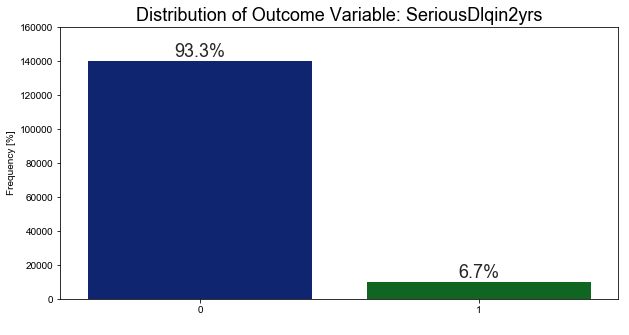

In [18]:
ax = sns.countplot(x = train_data.SeriousDlqin2yrs, palette="dark")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
plt.title('Distribution of Outcome Variable: SeriousDlqin2yrs')
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)
ax.set_ylabel('Frequency [%]')
ncount = len(train_data)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
    ha='center', va='bottom')


plt.show()

This allows us to observe how unbalanced our variable is. As far as we can see, it is very unbalanced because 0 covers many more observations.

In [19]:
class_0 = train_data.SeriousDlqin2yrs.value_counts()[0]
class_1 = train_data.SeriousDlqin2yrs.value_counts()[1]
print("Total number of class_0: {}".format(class_0))
print("Total number of class_1: {}".format(class_1))
print("Event rate: {} %".format(class_1/(class_0+class_1)*100))

Total number of class_0: 139974
Total number of class_1: 10026
Event rate: 6.683999999999999 %


### Correlation Matrix

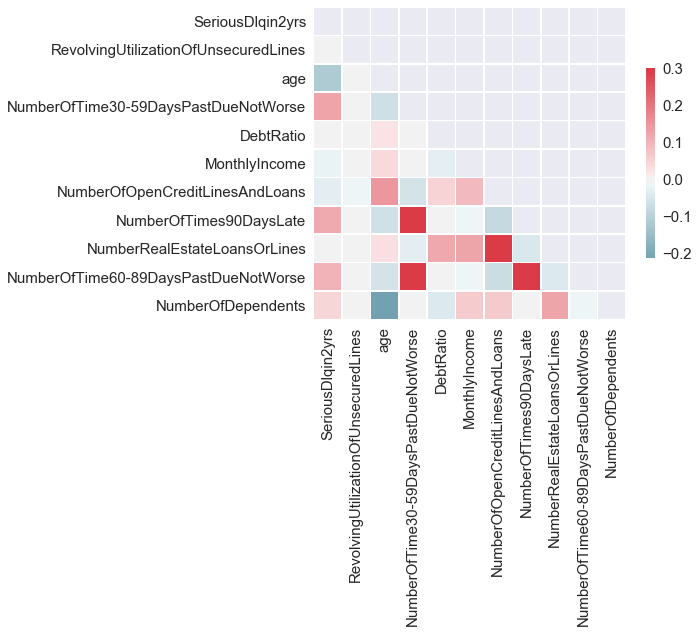

In [20]:
corr = train_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1,-0.0018,-0.12,0.13,-0.0076,-0.02,-0.03,0.12,-0.007,0.1,0.046
RevolvingUtilizationOfUnsecuredLines,-0.0018,1,-0.0059,-0.0013,0.004,0.0071,-0.011,-0.0011,0.0062,-0.001,0.0016
age,-0.12,-0.0059,1,-0.063,0.024,0.038,0.15,-0.061,0.033,-0.057,-0.21
NumberOfTime30-59DaysPastDueNotWorse,0.13,-0.0013,-0.063,1,-0.0065,-0.01,-0.055,0.98,-0.031,0.99,-0.0027
DebtRatio,-0.0076,0.004,0.024,-0.0065,1,-0.029,0.05,-0.0083,0.12,-0.0075,-0.041
MonthlyIncome,-0.02,0.0071,0.038,-0.01,-0.029,1,0.091,-0.013,0.12,-0.011,0.063
NumberOfOpenCreditLinesAndLoans,-0.03,-0.011,0.15,-0.055,0.05,0.091,1,-0.08,0.43,-0.071,0.065
NumberOfTimes90DaysLate,0.12,-0.0011,-0.061,0.98,-0.0083,-0.013,-0.08,1,-0.045,0.99,-0.01
NumberRealEstateLoansOrLines,-0.007,0.0062,0.033,-0.031,0.12,0.12,0.43,-0.045,1,-0.04,0.12
NumberOfTime60-89DaysPastDueNotWorse,0.1,-0.001,-0.057,0.99,-0.0075,-0.011,-0.071,0.99,-0.04,1,-0.011


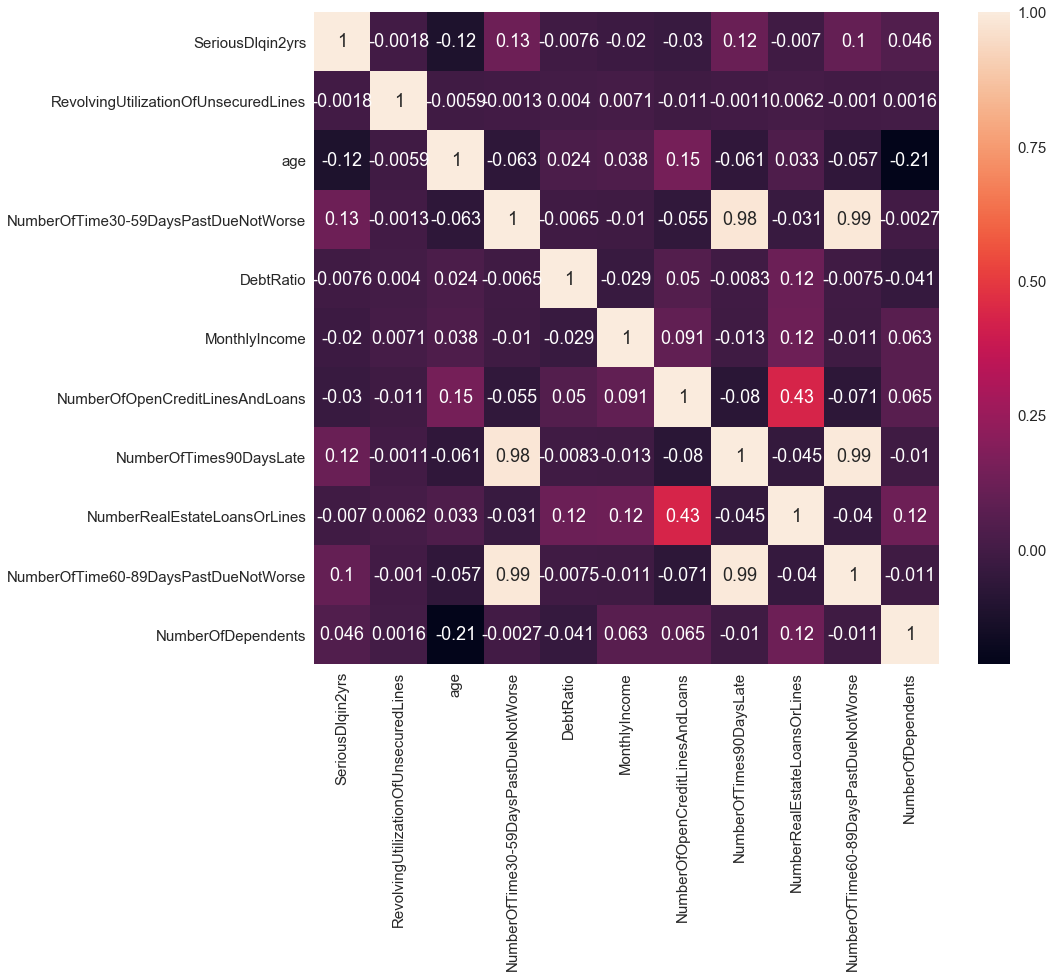

In [22]:
corr = train_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

As we can see in the numerical representation there is a strong relationship between NumberOfTimes90DaysLate with NumberOfTime3059DaysPastDueNotWorse and NumberOfTime6089DaysPastDueNotWorse.
Maintaining all those variables does not make much sense since we incur multi-levelality problems, so we must deal with the data.
As we have a set of variables that have multicolienality we are going to unify them in a categorical variable, that way we will eliminate the milticolienality

In [23]:
#Now, we create a new variable called "CombinedDefault" which is the sum of those three and we convert it into factor.

train_data["CombinedDefaulted"] = (train_data["NumberOfTimes90DaysLate"] + train_data["NumberOfTime60-89DaysPastDueNotWorse"])\
                                        + train_data["NumberOfTime30-59DaysPastDueNotWorse"]
train_data.loc[(train_data["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1

train_data["CombinedCreditLoans"] = train_data["NumberOfOpenCreditLinesAndLoans"] + \
                                        train_data["NumberRealEstateLoansOrLines"]
train_data.loc[(train_data["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
train_data.loc[(train_data["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1
train_data.CombinedCreditLoans.value_counts()

1    111375
0     38625
Name: CombinedCreditLoans, dtype: int64

In [24]:
#We convert the variable "NumberOfDependents into a categorical variable.
train_data["WithDependents"] = train_data["NumberOfDependents"]
train_data.loc[(train_data["WithDependents"] >= 1), "WithDependents"] = 1
train_data.WithDependents.value_counts()

0.0    86902
1.0    59174
Name: WithDependents, dtype: int64

In [25]:
train_data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
CombinedDefaulted                           0
CombinedCreditLoans                         0
WithDependents                           3924
dtype: int64

In [26]:
train_data["age_map"] = train_data["age"]
train_data.loc[(train_data["age"] >= 18) & (train_data["age"] < 60), "age_map"] = 1
train_data.loc[(train_data["age"] >= 60), "age_map"] = 0 
#replacing those numbers to categorical features then get the dummy variables
train_data["age_map"] = train_data["age_map"].replace(0, "working")
train_data["age_map"] = train_data["age_map"].replace(1, "senior")
train_data = pd.concat([train_data, pd.get_dummies(train_data.age_map,prefix='is')], axis=1)

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 17 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
CombinedDefaulted                       150000 non-null int64
CombinedCreditLoans                     150000 non-null int64
WithDependents                          146076 non-null float64
age_map    

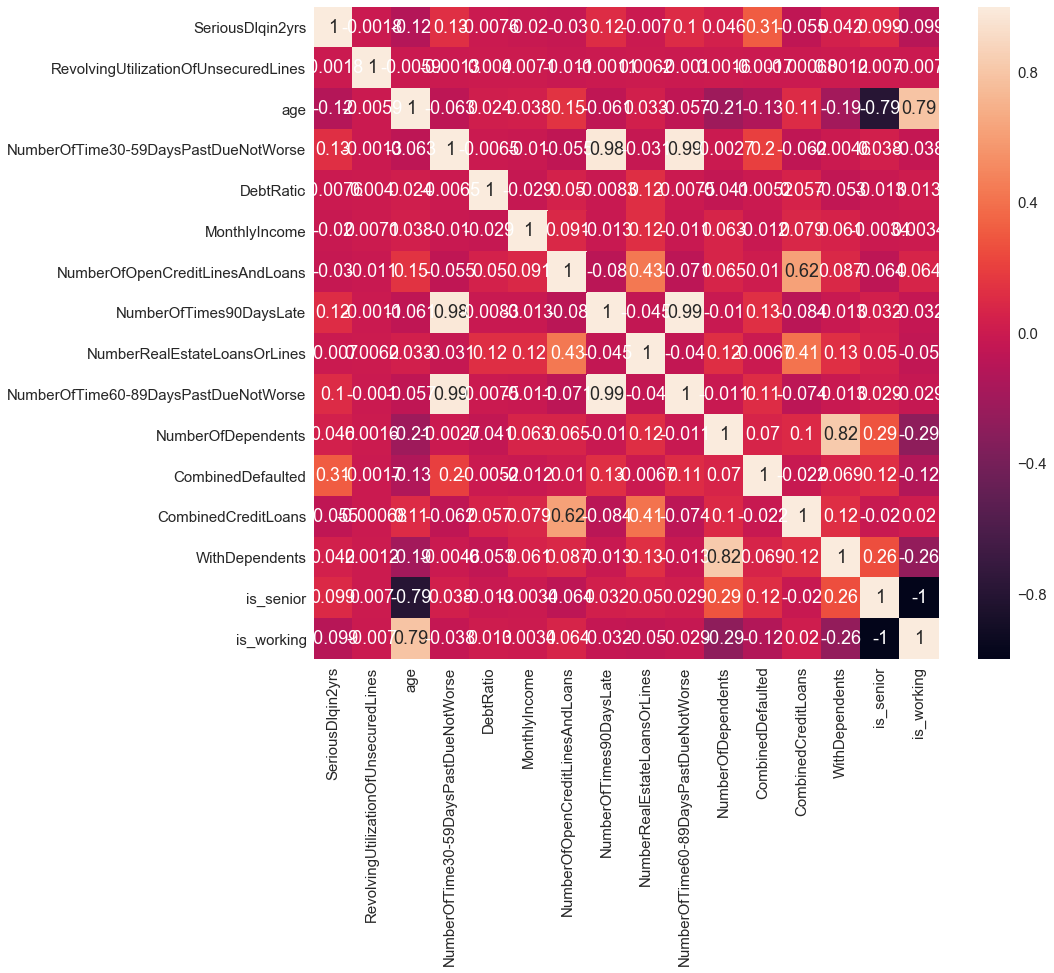

In [28]:
corr = train_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 17 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
CombinedDefaulted                       150000 non-null int64
CombinedCreditLoans                     150000 non-null int64
WithDependents                          146076 non-null float64
age_map    

### Dealing with Missing Data

In some cases, we would replace the NaN values by the mean/median of their column, but since we are dealing with an important variable 'MonthlyIncome', which is probably determining the probability of default of a person, we will just drop the NaN values.

Ahora vamos a realizar el tratamiento de valores faltantes, que solo se encuentran en la edad y NumberOfDependents, comenzaremos con la edad.

In [30]:
train_data.loc[train_data["age"] < 18] #There is only one person under 18

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefaulted,CombinedCreditLoans,WithDependents,age_map,is_senior,is_working
65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,1,1,1.0,working,0,1


In [31]:
#Now we change the other variable for its median
train_data.loc[train_data["age"] == 0, "age"] = train_data.age.median()

In [32]:
#Defining a working person variable
age_working = train_data.loc[(train_data["age"] >= 18) & (train_data["age"] < 60)]
#Defining a senior person variable
age_senior = train_data.loc[(train_data["age"] >= 60)]

age_working_impute = age_working.MonthlyIncome.mean()
age_senior_impute = age_senior.MonthlyIncome.mean()

In [33]:
train_data["MonthlyIncome"] = np.absolute(train_data["MonthlyIncome"])
train_data["MonthlyIncome"] = train_data["MonthlyIncome"].fillna(99999)
train_data["MonthlyIncome"] = train_data["MonthlyIncome"].astype('int64')
train_data.loc[((train_data["age"] >= 18) & (train_data["age"] < 60)) & (train_data["MonthlyIncome"] == 99999),\
               "MonthlyIncome"] = age_working_impute
train_data.loc[(train_data["age"] >= 60) & (train_data["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_senior_impute

In [34]:
train_data.isna().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
CombinedDefaulted                          0
CombinedCreditLoans                        0
WithDependents                          3924
age_map                                    0
is_senior                                  0
is_working                                 0
dtype: int64

In [35]:
#Comprobamos que no existen ese beneficio mensual.
train_data.loc[train_data["MonthlyIncome"] == 99999]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefaulted,CombinedCreditLoans,WithDependents,age_map,is_senior,is_working


In [36]:
train_data["MonthlyDebtPayments"] = train_data["DebtRatio"] * train_data["MonthlyIncome"]
train_data["MonthlyDebtPayments"] = np.absolute(train_data["MonthlyDebtPayments"])
train_data["MonthlyDebtPayments"] = train_data["MonthlyDebtPayments"].astype('int64')
train_data["age"] = train_data["age"].astype('int64')
train_data["MonthlyIncome"] = train_data["MonthlyIncome"].astype('int64')

In [37]:
train_data.isna().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
CombinedDefaulted                          0
CombinedCreditLoans                        0
WithDependents                          3924
age_map                                    0
is_senior                                  0
is_working                                 0
MonthlyDebtPayments                        0
dtype: int64


Now we replicate everything done for the part of the test, in a function we put it in all the previous data processing, and we have our test clean.

In [38]:
train_data.drop(["NumberOfOpenCreditLinesAndLoans",\
                 "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse",\
                 "WithDependents","age_map","is_senior","is_working", "MonthlyDebtPayments"], axis=1, inplace=True)
train_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans'],
      dtype='object')

In [39]:
def cleaned_dataset(dataset):
    dataset.loc[dataset["age"] <= 18, "age"] = dataset.age.median()
    
    age_working = dataset.loc[(dataset["age"] >= 18) & (dataset["age"] < 60)]
    age_senior = dataset.loc[(dataset["age"] >= 60)]

    age_working_impute = age_working.MonthlyIncome.mean()
    age_senior_impute = age_senior.MonthlyIncome.mean()

    dataset["MonthlyIncome"] = np.absolute(dataset["MonthlyIncome"])
    dataset["MonthlyIncome"] = dataset["MonthlyIncome"].fillna(99999)
    dataset["MonthlyIncome"] = dataset["MonthlyIncome"].astype('int64')

    dataset.loc[((dataset["age"] >= 18) & (dataset["age"] < 60)) & (dataset["MonthlyIncome"] == 99999),\
                   "MonthlyIncome"] = age_working_impute
    dataset.loc[(train_data["age"] >= 60) & (dataset["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_senior_impute
    dataset["NumberOfDependents"] = np.absolute(dataset["NumberOfDependents"])
    dataset["NumberOfDependents"] = dataset["NumberOfDependents"].fillna(0)
    dataset["NumberOfDependents"] = dataset["NumberOfDependents"].astype('int64')

    dataset["CombinedDefaulted"] = (dataset["NumberOfTimes90DaysLate"] + dataset["NumberOfTime60-89DaysPastDueNotWorse"])\
                                            + dataset["NumberOfTime30-59DaysPastDueNotWorse"]

    dataset.loc[(dataset["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1

    dataset["CombinedCreditLoans"] = dataset["NumberOfOpenCreditLinesAndLoans"] + \
                                            dataset["NumberRealEstateLoansOrLines"]
    dataset.loc[(dataset["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
    dataset.loc[(dataset["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1

    dataset.drop(["NumberOfOpenCreditLinesAndLoans",\
                 "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse"], axis=1, inplace=True)

In [40]:
#Esto solo de sebe ejecutar 1 vez para limpiarlo
cleaned_dataset(test_data)

In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 9 columns):
SeriousDlqin2yrs                        101503 non-null int64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           101503 non-null float64
NumberOfDependents                      101503 non-null int64
CombinedDefaulted                       101503 non-null int64
CombinedCreditLoans                     101503 non-null int64
dtypes: float64(4), int64(5)
memory usage: 12.7 MB


### Dealing with Outliers

To define whether there is an outlier (to define a threshold), we need to standardize the variables, i.e. make their mean = 0 and standard deviation = 1. Our outcome variable will not have outliers since it has a balance of zero and ones. 


No problem with outliers in this case,
only age?


In [42]:
#standardizing variables
from sklearn.preprocessing import StandardScaler

MonthlyIncome_scaled = StandardScaler().fit_transform(train_data['MonthlyIncome'][:,np.newaxis]);
low_range = MonthlyIncome_scaled[MonthlyIncome_scaled[:,0].argsort()][:10]
high_range= MonthlyIncome_scaled[MonthlyIncome_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.51809357]
 [-0.51809357]
 [-0.51809357]
 [-0.51809357]
 [-0.51809357]
 [-0.51809357]
 [-0.51809357]
 [-0.51809357]
 [-0.51809357]
 [-0.51809357]]

outer range (high) of the distribution:
[[ 48.3156935 ]
 [ 49.91401015]
 [ 53.7914439 ]
 [ 54.02202633]
 [ 56.19454758]
 [ 64.31205835]
 [ 82.74778343]
 [120.60367306]
 [138.76766801]
 [233.07277582]]


/Users/miguel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/miguel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


We can see there are no outliers on the low-outer range (close to zero) but there are many in the high-outer range. For example, the last three values.

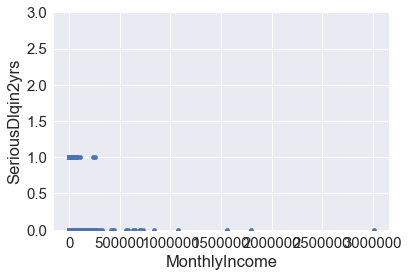

In [43]:
#bivariate analysis monthlyincome/seriousdlqin2yrs
var = 'MonthlyIncome'
data = pd.concat([train_data['SeriousDlqin2yrs'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SeriousDlqin2yrs', ylim=(0,3))

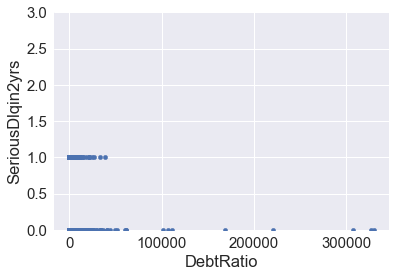

In [44]:
#bivariate analysis debtratio/seriousdlqin2yrs
var = 'DebtRatio'
data = pd.concat([train_data['SeriousDlqin2yrs'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SeriousDlqin2yrs', ylim=(0,3))

In [45]:
train_data.DebtRatio.sort_values(ascending=False).head(10) 

60153     329664.0
36601     326442.0
127048    307001.0
58901     220516.0
4855      168835.0
7514      110952.0
103042    106885.0
69846     101320.0
66786      61907.0
53683      61106.5
Name: DebtRatio, dtype: float64

**Seems very strange to me, that debt ratio can be 61,106.5 or around such high numbers**.

I would consider eliminating all those ratios above 25000 

In [46]:
#standardizing variables
from sklearn.preprocessing import StandardScaler

DebtRatio_scaled = StandardScaler().fit_transform(train_data['DebtRatio'][:,np.newaxis]);
low_range = DebtRatio_scaled[DebtRatio_scaled[:,0].argsort()][:10]
high_range= DebtRatio_scaled[DebtRatio_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.17322752]
 [-0.17322752]
 [-0.17322752]
 [-0.17322752]
 [-0.17322752]
 [-0.17322752]
 [-0.17322752]
 [-0.17322752]
 [-0.17322752]
 [-0.17322752]]

outer range (high) of the distribution:
[[ 29.81310492]
 [ 30.20592825]
 [ 49.54677285]
 [ 52.27764338]
 [ 54.27341166]
 [ 82.67790023]
 [108.03892805]
 [150.47906063]
 [160.01919611]
 [161.6003039 ]]


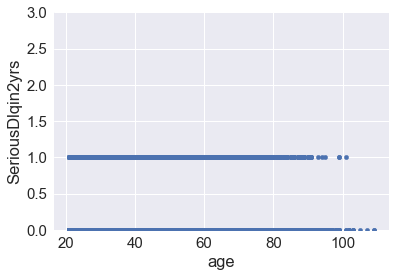

In [47]:
#bivariate analysis age/seriousdlqin2yrs
var = 'age'
data = pd.concat([train_data['SeriousDlqin2yrs'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SeriousDlqin2yrs', ylim=(0,3))

In [48]:
age_scaled = StandardScaler().fit_transform(train_data['age'][:,np.newaxis])
low_range = age_scaled[age_scaled[:,0].argsort()][:10]
high_range= age_scaled[age_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.11868734]
 [-2.11868734]
 [-2.11868734]
 [-2.11868734]
 [-2.11868734]
 [-2.11868734]
 [-2.11868734]
 [-2.11868734]
 [-2.11868734]
 [-2.11868734]]

outer range (high) of the distribution:
[[3.36495669]
 [3.36495669]
 [3.36495669]
 [3.432656  ]
 [3.432656  ]
 [3.432656  ]
 [3.56805462]
 [3.70345324]
 [3.83885186]
 [3.83885186]]


/Users/miguel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/miguel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [49]:
train_data.age.sort_values(ascending= False).head(25)

105791    109
138292    109
40008     107
56762     105
135026    103
57968     103
19885     103
25562     102
90938     102
96451     102
93814     101
7764      101
116130    101
24008      99
59393      99
78708      99
106913     99
39847      99
2923       99
57527      99
87212      99
92719      99
108365     98
9871       98
91971      98
Name: age, dtype: int64

**We see the variable age has outliers, such as people aged 95 or above, who apply for credit. Especially surprising is having 103-year-olds in their database.**

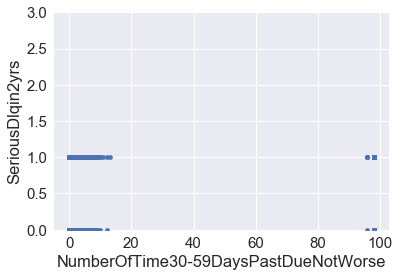

In [50]:
#bivariate analysis NumberOfTime30-59DaysPastDueNotWorse/seriousdlqin2yrs
var = 'NumberOfTime30-59DaysPastDueNotWorse'
data = pd.concat([train_data['SeriousDlqin2yrs'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SeriousDlqin2yrs', ylim=(0,3))

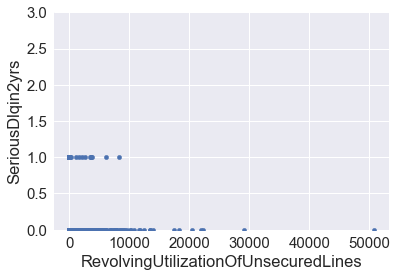

In [51]:
#bivariate analysis RevolvingUtilizationOfUnsecuredLines/seriousdlqin2yrs
var = 'RevolvingUtilizationOfUnsecuredLines'
data = pd.concat([train_data['SeriousDlqin2yrs'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SeriousDlqin2yrs', ylim=(0,3))

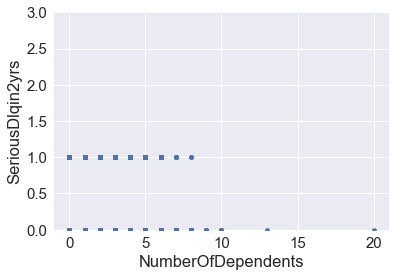

In [52]:
#bivariate analysis NumberOfDependents/seriousdlqin2yrs
var = 'NumberOfDependents'
data = pd.concat([train_data['SeriousDlqin2yrs'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SeriousDlqin2yrs', ylim=(0,3))

**It is visible that there are ouliers**

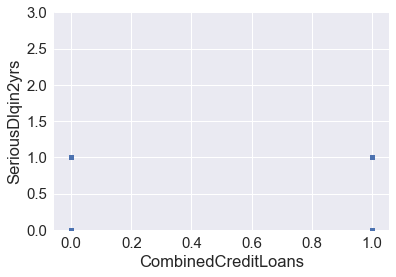

In [53]:
#bivariate analysis CombinedCreditLoans/seriousdlqin2yrs
var = 'CombinedCreditLoans'
data = pd.concat([train_data['SeriousDlqin2yrs'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SeriousDlqin2yrs', ylim=(0,3))

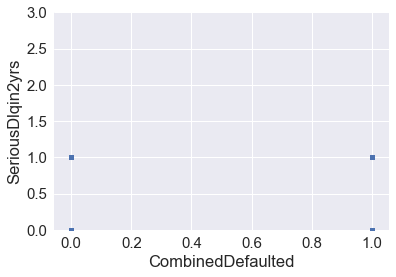

In [54]:
#bivariate analysis CombinedDefaulted/seriousdlqin2yrs
var = 'CombinedDefaulted'
data = pd.concat([train_data['SeriousDlqin2yrs'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SeriousDlqin2yrs', ylim=(0,3))

In [55]:
train_data.NumberOfDependents.sort_values(ascending=False).head(3)

6300      20.0
128035    13.0
22699     10.0
Name: NumberOfDependents, dtype: float64

**These represent a very high number of people who are dependent on one person.**

#### Histograms

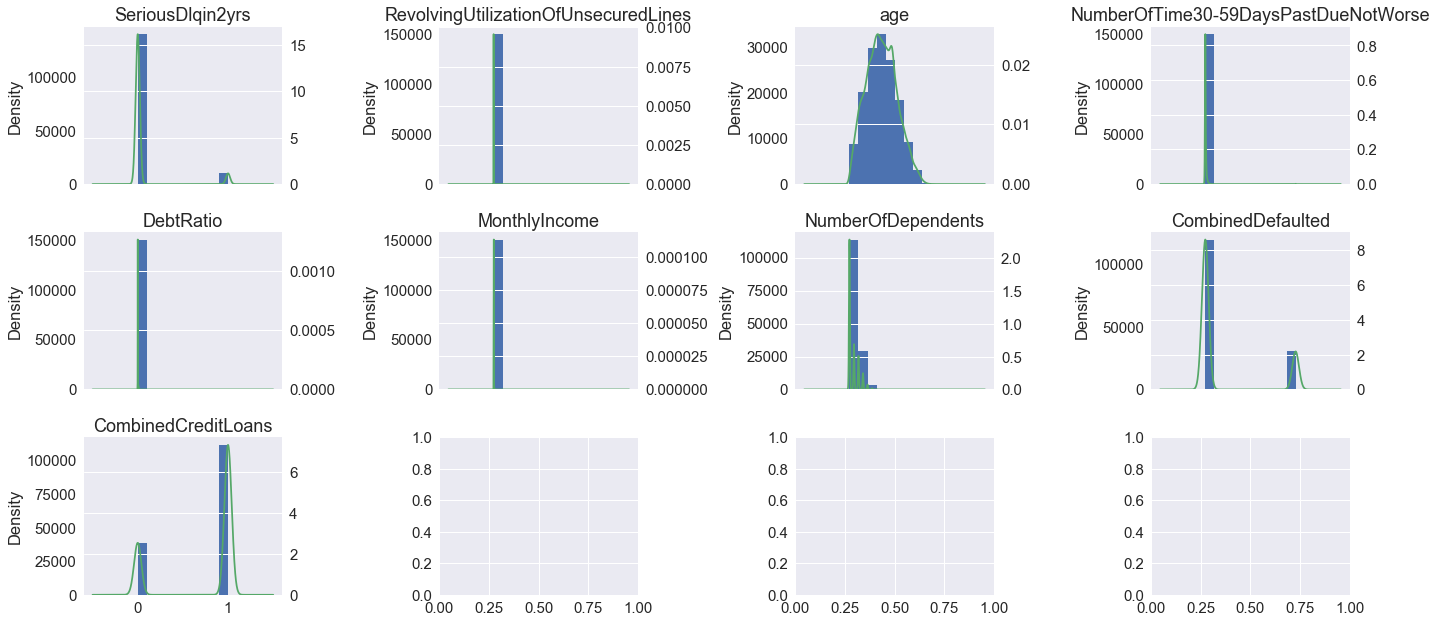

In [56]:
# Histogram with Kernel Density Estimate Plot (KDE)
# Source: https://stackoverflow.com/questions/43638851/pandas-histogram-plot-with-kde
def plot_histograms(df, columns):
    # keep total number of subplot
    k = len(df.columns)
    # n = number of chart columns
    n = columns
    m = (k - 1) // n + 1
    
    # Create figure
    fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))

    # Iterate through columns, tracking the column name and 
    # which number we are at i. Within each iteration, plot
    for i, (name, col) in enumerate(df.iteritems()):
        r, c = i // n, i % n
        ax = axes[r, c]
        # the histogram
        col.hist(ax=ax)
        # kde = Kernel Density Estimate plot
        ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
        ax2.set_ylim(0)

    # Use tight_layout() as an easy way to sharpen up the layout spacing
    fig.tight_layout()

plot_histograms(df=train_data, columns=4)

## Logistic Regression

In [57]:
X = train_data.drop("SeriousDlqin2yrs",axis=1)
y = train_data["SeriousDlqin2yrs"]

In [58]:
X['NumberOfDependents'] = X['NumberOfDependents'].fillna(0)

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 8 columns):
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null int64
NumberOfDependents                      150000 non-null float64
CombinedDefaulted                       150000 non-null int64
CombinedCreditLoans                     150000 non-null int64
dtypes: float64(3), int64(5)
memory usage: 15.3 MB


In [60]:
X.shape, y.shape

((150000, 8), (150000,))

In [61]:
X.isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfDependents                      0
CombinedDefaulted                       0
CombinedCreditLoans                     0
dtype: int64

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42)

In [63]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((112500, 8), (37500, 8), (112500,), (37500,))

In [64]:
logit = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=1.0, max_iter=500)
scaler = StandardScaler().fit(X_train)

In [65]:
X_train_scaled = scaler.transform(X_train) #scaling features!
X_val_scaled = scaler.transform(X_val)

In [66]:
logit.fit(X_train_scaled, y_train)
logit_scores_proba = logit.predict_proba(X_train_scaled)
logit_scores = logit_scores_proba[:,1]

In [71]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

AUC Score 0.8037479906855112


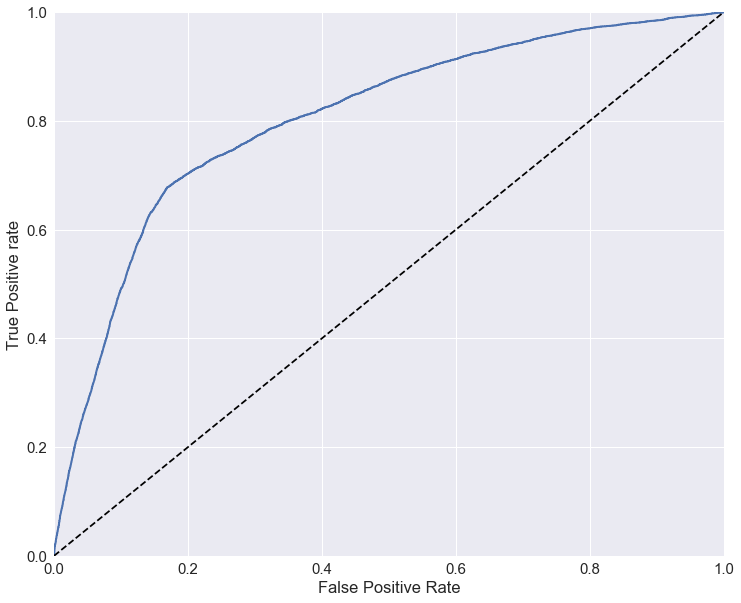

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)
plot_roc_curve(fpr_logit,tpr_logit)
print("AUC Score {}".format(roc_auc_score(y_train,logit_scores)))

AUC Score 0.8011680084211134


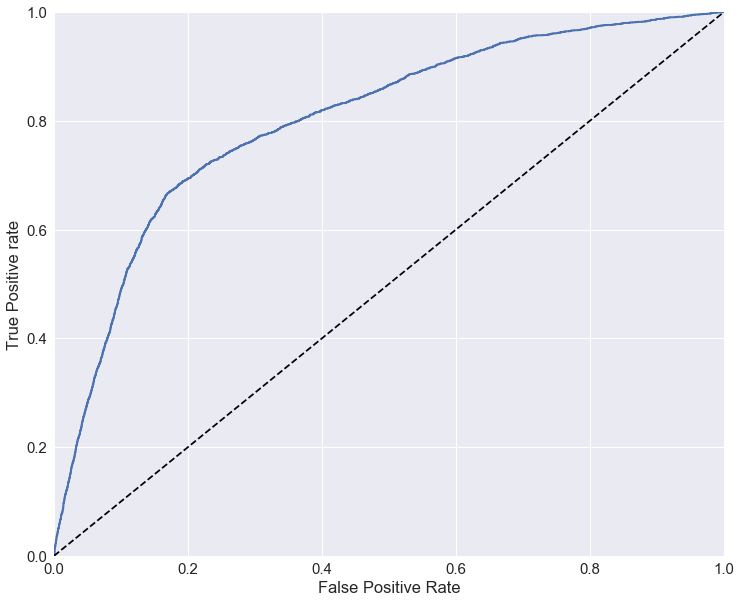

In [73]:
logit_scores_proba_val = logit.predict_proba(X_val_scaled)
logit_scores_val = logit_scores_proba_val[:,1]
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_val, logit_scores_val)
plot_roc_curve(fpr_logit_val,tpr_logit_val)
print("AUC Score {}".format(roc_auc_score(y_val,logit_scores_val)))

In [74]:
logit_C_low = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=0.001, max_iter=1000)
logit_C_low.fit(X_train_scaled, y_train)
logit_C_low_scores_proba = logit_C_low.predict_proba(X_train_scaled)
logit_C_low_scores = logit_C_low_scores_proba[:,1]
fpr_logit_C_low, tpr_logit_C_low, thresh_logit_C_low = roc_curve(y_train, logit_C_low_scores)
#plot_roc_curve(fpr_logit_C_low,tpr_logit_C_low)
print("AUC Score {}".format(roc_auc_score(y_train,logit_C_low_scores)))

AUC Score 0.8022986290107657


### Confusion matrix

In [75]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
Y_pred = logreg.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.93


In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix_lr = confusion_matrix(y_val, Y_pred)
print(confusion_matrix_lr)

[[34984    41]
 [ 2455    20]]


## SVM

In [90]:
classifier = svm.SVC(kernel='rbf')

In [91]:
classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Confusion matrix

In [92]:
Y_pred = classifier.predict(X_val)
print('Accuracy of SupportVectorMachine classifier on test set: {:.2f}'.format(classifier.score(X_val, y_val)))

Accuracy of SupportVectorMachine classifier on test set: 0.95


In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(y_val, Y_pred)
print(confusion_matrix_svm)

[[35017     8]
 [ 1940   535]]


## Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 30)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_val)
print (random_forest.score(X_train, y_train))

0.8597339477192492


[0.24976173 0.13845582 0.02432351 0.25077596 0.17960758 0.04432515
 0.10008437 0.01266589]


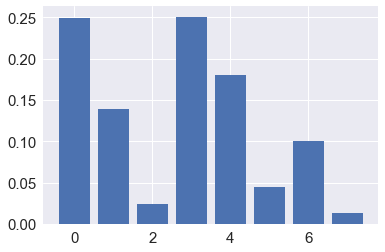

In [79]:
from sklearn.ensemble import RandomForestClassifier
print(random_forest.feature_importances_)
list(random_forest.feature_importances_)
pyplot.bar(range(len(random_forest.feature_importances_)), random_forest.feature_importances_)
pyplot.show()

### Confusion matrix

In [80]:
randomMat = RandomForestClassifier()
randomMat.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
Y_pred = randomMat.predict(X_val)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomMat.score(X_val, y_val)))

Accuracy of random forest classifier on test set: 0.93


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix_rf = confusion_matrix(y_val, Y_pred)
print(confusion_matrix_rf)

[[34618   407]
 [ 2164   311]]


## XGBoost

In [83]:
def XGBoost(X, y):
	print("Starting training of XGBoost")
	#start_time = time.time()

	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
	clf = XGB.XGBClassifier(learning_rate=0.15, n_estimators=170, nthread=6, max_depth=8, seed=0, silent=True,
							subsample=0.85, colsample_bytree=0.85)
	clf.fit(X, y)
	score = clf.score(X_test, y_test)
	print("XGBoost score: ", score)
	return clf

In [84]:
XGBoost(X, y)

Starting training of XGBoost
XGBoost score:  0.9468


/Users/miguel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, gamma=0, learning_rate=0.15,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=170, n_jobs=1, nthread=6, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=0, silent=True, subsample=0.85)

RF roc score: 0.9285517857142856


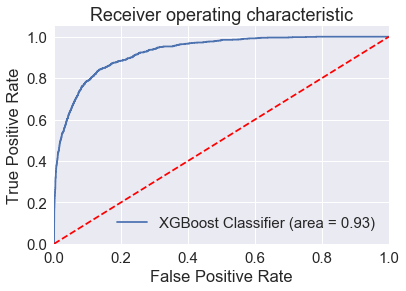

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
clf = XGB.XGBClassifier(learning_rate=0.15, n_estimators=170, nthread=6, max_depth=8, seed=0, silent=True,
                        subsample=0.85, colsample_bytree=0.85)
clf.fit(X, y)
probs = clf.predict_proba(X_test)
roc = roc_auc_score(y_true = y_test, y_score = probs[:, 1])
print("RF roc score: {}".format(roc))


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost Classifier (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.savefig('XGB_ROC')

[0.23598075 0.16016847 0.03844765 0.2864621  0.20234656 0.04729242
 0.01287605 0.01642599]


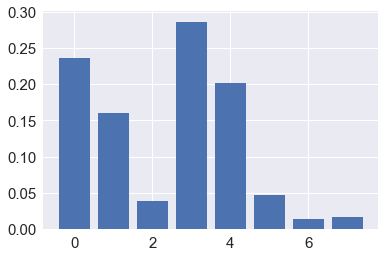

In [86]:
print(clf.feature_importances_)
list(clf.feature_importances_)

pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

### Confusion matrix

In [87]:
xgbMat = XGBClassifier()
xgbMat.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [88]:
Y_pred = xgbMat.predict(X_val)
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgbMat.score(X_val, y_val)))

Accuracy of XGBoost classifier on test set: 0.94


/Users/miguel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miguel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix_xgb = confusion_matrix(y_val, Y_pred)
print(confusion_matrix_xgb)

[[34859   166]
 [ 2238   237]]


## Model comparison

In [96]:
print('Logistic Regression')
print(confusion_matrix_xgb)
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logreg.score(X_val, y_val)))
print('')
print('SupportVectorMachine')
print(confusion_matrix_svm)
print('Accuracy of SupportVectorMachine classifier on test set: {:.2f}'.format(classifier.score(X_val, y_val)))
print('')
print('Random Forest')
print(confusion_matrix_rf)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(randomMat.score(X_val, y_val)))
print('')
print('XGBoost')
print(confusion_matrix_xgb)
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgbMat.score(X_val, y_val)))
print('')

Logistic Regression
[[34859   166]
 [ 2238   237]]
Accuracy of Logistic Regression classifier on test set: 0.93

SupportVectorMachine
[[35017     8]
 [ 1940   535]]
Accuracy of SupportVectorMachine classifier on test set: 0.95

Random Forest
[[34618   407]
 [ 2164   311]]
Accuracy of Random Forest classifier on test set: 0.93

XGBoost
[[34859   166]
 [ 2238   237]]
Accuracy of XGBoost classifier on test set: 0.94



/Users/miguel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Conclusions

Once I have finished our Machine Learning model to help borrowers to make the best financial decisions, we have some conclusions.

    - One of the main difficulties of our model was to clean and prepare both training and testing datasets in order to use ML algorithms and predict our dependent variable.
    - After using the four algorithms (Logistic Regression, Suport Vector Machine, Random Forest and XGBoost), the one I liked the most for this work was the XGBoost one because apart from giving back one the best scores (0.94), it was the fastest one.
    - Suport Vector Machine is an absolutely slow algorithm so, in my opinion, it doesn't make much sense using it because there are other algorithms that can give an accurate prediction in less time.

In [97]:
kaggle = test_data.drop('SeriousDlqin2yrs', axis=1)

In [98]:
sb = clf.predict_proba(kaggle)
sb_scores = sb[:,1]

In [99]:
ids = np.arange(1, 101504)
sub_df = pd.DataFrame({'Id' : ids, 'Probability' : sb_scores})
sub_df.to_csv('submission.csv', index = False)

Image(url= "http://i64.tinypic.com/1e4879.png")

## References

Kaggle: https://www.kaggle.com/leafar/give-me-some-credit/notebook?scriptVersionId=3161934
https://github.com/ksopyla/svm_mnist_digit_classification/blob/master/svm_mnist_classification.py
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
https://www.datacamp.com/community/tutorials/random-forests-classifier-python